# Dataset Analysis project
Data source: https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge

## Dataset Description 
Describe columns 

- Column1:
- Column2:
- ...

# 01 Dataset loading

In [1]:
import pandas as pd 
import glob
import numpy as np 
import seaborn as sns

In [2]:
df1 = pd.read_csv("data/train.csv")
df2 = pd.read_csv("data/test.csv")

In [11]:
glob.glob("data/*.csv")

['data\\test.csv', 'data\\train.csv']

In [12]:
file_names = glob.glob("data/*.csv")
df_list = []

for file in file_names:
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

df = pd.concat(df_list, axis=0, ignore_index=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


In [13]:
df.shape

(2919, 81)

In [14]:
df.index

RangeIndex(start=0, stop=2919, step=1)

## 02 Data Types

In [15]:
df.dtypes.value_counts()

object     43
int64      26
float64    12
Name: count, dtype: int64

In [16]:
string_columns = df.select_dtypes(include='object').columns.tolist()
numeric_columns = df.select_dtypes(include='number').columns.tolist()

In [17]:
df.loc[:, numeric_columns].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,140,0,0,0,120,0,0,6,2010,NaN
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,393,36,0,0,0,0,12500,6,2010,NaN
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,212,34,0,0,0,0,0,3,2010,NaN
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,360,36,0,0,0,0,0,6,2010,NaN
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,82,0,0,144,0,0,1,2010,NaN


In [18]:
df.loc[:, string_columns].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## 03 NaN Analysis 

In [19]:
nan_counts = df.isna().sum()
nan_counts_sorted = nan_counts.loc[nan_counts > 0].sort_values(ascending=False).to_frame(name="counts")
nan_counts_sorted["percentage"] = (nan_counts_sorted.counts*100)/df.shape[0]
nan_counts_sorted

,counts,percentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
MasVnrType,1766,60.500171
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageQual,159,5.447071
GarageYrBlt,159,5.447071


### 03.1 Nan replacements numeric

# 04 General analysis 

In [20]:
df.loc[:, numeric_columns].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


Conclusion: 

In [21]:
df.loc[:, string_columns].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


<Axes: >

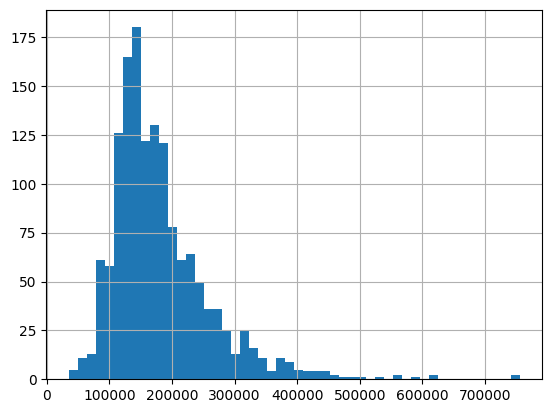

In [22]:
df.SalePrice.hist(bins=50)

# 05 Target column analysis 

In [23]:
df.SalePrice.isna().sum()

np.int64(1459)

In [24]:
df = df.loc[df.SalePrice.notna(), :]
df.shape

(1460, 81)

<Axes: ylabel='SalePrice'>

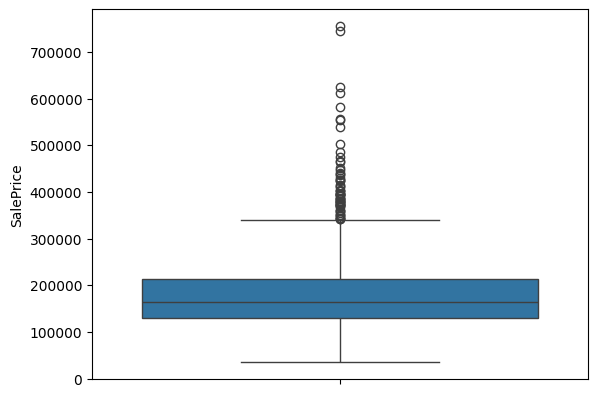

In [25]:
sns.boxplot(df.SalePrice)

## 05.1 Correlation analysis

In [26]:
df = df.loc[:, numeric_columns]
df.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [27]:
corr_df = pd.DataFrame()
corr_df["pearson"] = df.corr(method="pearson")["SalePrice"].sort_values()
corr_df["kendall"] = df.corr(method="kendall")["SalePrice"].sort_values()
corr_df["spearman"] = df.corr(method="spearman")["SalePrice"].sort_values()

In [28]:
corr_df

,pearson,kendall,spearman
KitchenAbvGr,-0.135907,-0.134718,-0.164826
EnclosedPorch,-0.128578,-0.172094,-0.218394
MSSubClass,-0.084284,-0.003979,0.007192
OverallCond,-0.077856,-0.103492,-0.129325
YrSold,-0.028923,-0.021796,-0.029899
LowQualFinSF,-0.025606,-0.055308,-0.067719
Id,-0.021917,-0.012030,-0.018546
MiscVal,-0.021190,-0.050917,-0.062727
BsmtHalfBath,-0.016844,-0.009962,-0.012189
BsmtFinSF2,-0.011378,-0.030710,-0.038806
